# PROBLEM 8: Grid and Time Stepping Considerations

### Table 8.1. Grid data

                                                                  Well locations (row, column)

| Grid | Size  | Grid Spacing            | Pumping Well | Well 1 | Well 2 | Well 3 |
|------|-------|-------------------------|--------------|--------|--------|--------|
| 1    | 4\*4   | 2500 row, column 1      | 3,2          | 2,2    | 2,3    | 3,3    |
|      |       | 500 row, column 2,3      |              |        |        |        |
|      |       | 2500 row, column 4       |              |        |        |        |
| 2    | 7\*7   | 1750 row, column 1      | 5,3          | 3,3    | 3,5    | 5,5    |
|      |       | 2000 row, column 2       |              |        |        |        |
|      |       | 2500 row, column 3-5     |              |        |        |        |
|      |       | 1750 row, column 7       |              |        |        |        |
| 3    | 10\*10 | 1250 row, column 1      | 7,4          | 4,4    | 4,7    | 7,7    |
|      |       | 1666.7 row, column 2-9   |              |        |        |        |
|      |       | 1250 row, colum 10       |              |        |        |        |
| 4    | 16\*16 | 500 row, column 1       | 11,6         | 6,6    | 6,11   | 11,11  |
|      |       | 1000 row, column 2-15    |              |        |        |        |
|      |       | 500 row, column 16       |              |        |        |        |
| 5    | 30\*30 | 416.7 row, column 1-6   | 20,11        | 11,11  | 11,20  | 20,20  |
|      |       | 555.6 row, column 7-24   |              |        |        |        |
|      |       | 416.7 row, column 25-30  |              |        |        |   .    |

* _spacing along a column is the same as along a row such that DELX( 1 ) = DELY( 1), DELX(2) = DELY(2), etc._

_For row 1, column 1:_
    
_$$C = \frac{TW}{L} = \frac{2400 \frac{m^2}{d}\cdot2500 m}{1250 m} = 4800 \frac{m^2}{d}$$_
    
_For row 1, column 2:_
    
_$$C = \frac{TW}{L} = \frac{2400 \frac{m^2}{d}\cdot5000 m}{1250 m} = 9600 \frac{m^2}{d}$$_
    
Variable meanings:

$$C = Conductance$$
$$T = Transmissivity = (hk \cdot (top - botm))$$
$$L = Length \hspace{.2cm} of \hspace{.2cm} flow \hspace{.2cm} path \hspace{.2cm} (node \hspace{.2cm}  center \hspace{.2cm} to \hspace{.2cm} edge)$$
$$W = Width \hspace{.2cm} of \hspace{.2cm} face \hspace{.2cm} perpendicular \hspace{.2cm} to \hspace{.2cm} flow$$

_Note that L remains constant for a given grid because distance from center to edge is always
the same, but W changes due to varying column widths._

$$A=b*w \hspace{.3cm} (Area = base * width)$$
$$b = top - botm$$
$$Formula  ->  C=\frac{hk*A}{L}  ->  C=\frac{hk*b*w}{L}  ->  C=\frac{hk*(top-botm)*w}{L}  -> C=\frac{T*w}{L}$$

* _In each case, use the PCG package, acceleration parameter = 1.0, closure criterion = 0.0001, and maximum iterations = 50._

### Part d

_Rerun one of the grids used in parta, changing only the closure criterion. Record
drawdowns or observations wells 1, 2, and 3 as well as the total number of
iterations for all time steps. Run the following cases:_

1. _HCLOSE = 0.0001_

2. _HCLOSE = 0.001_

3. _HCLOSE = 0.01_

4. _HCLOSE = 0.1_

5. _HCLOSE = 0.5_

6. _HCLOSE = 1.0_

_In part d, the data set from part a is run, except changes are made in the_ [PCG package](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#p) _to the closure criterion._

#### Table 8.5. Comparison of results for variations in closure criterion in part d
                                                Drawdown (m)
                                              Observation Well
                                                                                                 
| HCLOSE | # of Iterations | CPU  | 1     | 2     | 3     |
|--------|-----------------|------|-------|-------|-------|
| 0.0001 | 47              | 5.64 | 1.956 | 1.493 | 2.806 |
| 0.001  | 42              | 4.94 | 1.956 | 1.493 | 2.816 |
| 0.001  | 36              | 4.83 | 1.956 | 1.493 | 2.807 |
| 0.01   | 25              | 4.65 | 1.945 | 1.482 | 2.801 |
| 0.05   | 10              | 4.48 | 1.653 | 1.177 | 2.797 |
| 1      | 10              | 4.48 | 1.653 | 1.177 | 2.259 |

In [ ]:
import pandas as pd
table = pd.read_csv('../Data/table8.5.csv')

table.columns #displays all the column names in the file

#prints out the first 5 rows into a table
table.head()

In [ ]:
#prints the whole dataframe instead of just the first 5 rows
print(table)

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

### Grid 1

| Column # | Row Spacing |
|----------|-------------|
| 1        | 2500        |
| 2        | 5000        |
| 3        | 5000        |
| 4        | 2500        |

In [2]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table8.1_grid1.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
2500.0
5000.0
5000.0
2500.0
[2500.0, 5000.0, 5000.0, 2500.0]


[ 2500.  5000.  5000.  2500.]
15000.0
5000.0 5000.0
5000.0 10000.0
10000.0 10000.0
10000.0 5000.0


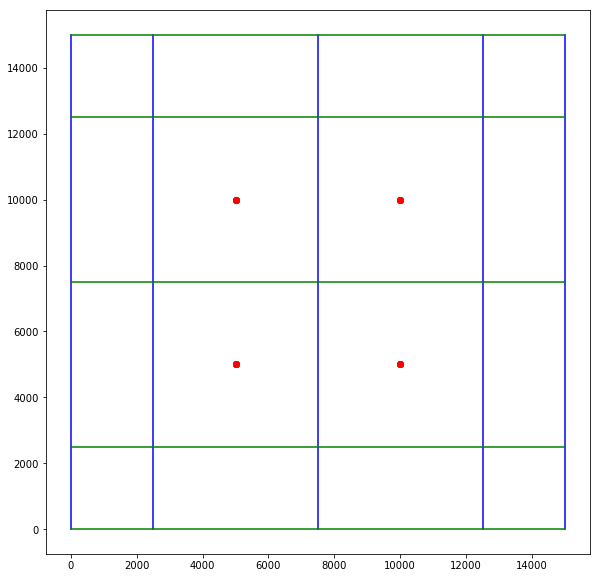

In [3]:
#code to create grid 1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid1_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

# HCLOSE = 0.0001

In [20]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package 
hk = 2400 #hydraulic conductivity
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length of cell/2

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

[ 2500.  5000.  5000.  2500.]
[4800.0, 9600.0, 9600.0, 4800.0]
[[0, 0, 0, 0.0, 4800.0], [0, 0, 1, 0.0, 9600.0], [0, 0, 2, 0.0, 9600.0], [0, 0, 3, 0.0, 4800.0]]
FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p8_pd1.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/12 11:06:24

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6   

In [ ]:
delr_float = delr_array.astype(np.float)
print(delr_float)

In [ ]:
w = [[(2400 * w)/1250] for w in np.nditer(delr_float)]
print(w)

# HCLOSE = 0.001

In [ ]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.001
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

# HCLOSE = 0.01

In [ ]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.01
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

# HCLOSE = 0.1

In [ ]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.1
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

# HCLOSE = 0.5

In [ ]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.5
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct
# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

# HCLOSE = 1.0

In [ ]:
#Flopy objects
modelname1 = 'p8_pd1' #short for problem 8 part d, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 20 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

#wel package
pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 1.0
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr_array into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

In [ ]:
import pandas as pd
table = pd.read_csv('../Data/table8.2.csv')

table.columns #displays all the column names in the file

#prints out the first 5 rows into a table
table.head()

In [ ]:
#prints the whole dataframe instead of just the first 5 rows
print(table)

### DISCUSSION OF RESULTS
_The results of part d, shown in Table 8.5, indicate that the optimal closure criterion for this
problem is 0.01. Little, if anything, is gained by a smaller closure criterion. A general rule of
thumb is that the closure criterion should be an order of magnitude smaller than the desired
accuracy. It is interesting to note that order of magnitude changes in closure criterion are not
excessively time consuming. However, some complex problems reach a threshold where
further convergence is no longer possible. Note that the results when using closure criterions
of 0.5 and 1.0 are identical because the closure criterion is satisfied after the frost iteration of
each time step._

To assess the reason for the seemingly large error between analytic and numerical results, the finite element code SEFTRAN (GeoTrans, 1988) Was run for comparative purposes. SEFTRAN allows usage of a backward and central difference scheme for approximation of the time derivative. MODFLOW uses only a backward difference scheme. Drawdowns at well 2 for each grid are shown in Table 8.6. Notice that for this particular problem the numerical method (finite element or finite difference) does not seem as important as the approximation of the time derivative in matching the analytical result.


### _Table 8.6. Comparison of drawdowns (m) at well 2 for various time derivatives and spatial approximations (analytical = 1.63)_

| Grid | Finite-Difference | Backward Difference Finite-Element | Central Difference Finite-Element |
|------|-------------------|------------------------------------|-----------------------------------|
| 1    | 1.493             | 1.62                               | 1.729                             |
| 2    | 1.537             | 1.565                              | 1.671                             |
| 3    | 1.546             | 1.556                              | 1.662                             |
| 4    | 1.55              | 1.553                              | 1.659                             |
| 5    | 1.55              |                --                  |    --                             |
